In [1]:
import numpy as np
import matplotlib.pylab as plt

# **Eliminación Gaussiana**

In [2]:
#1) Escriba un código de eliminación Gaussiana para resolver el sistema Ax=B.

N=np.random.randint(3, 7)
Arreglo=(np.random.random((N,N))*10.0)-5.0
B=(np.random.random((N,1))*10.0)-5.0

for i in range(N):
    B[i] = B[i]/Arreglo[i,i]
    Arreglo[i,:] = Arreglo[i,:]/Arreglo[i,i]
    for j in range(i+1,N):
        B[j] = B[j] - B[i]*Arreglo[j,i]
        Arreglo[j,:] = Arreglo[j,:] - Arreglo[j,i]*Arreglo[i,:]

x_calc = np.empty(N)
for i in range(N-1, -1, -1): 
    x_calc[i] = B[i]
    for j in range(i+1, N):
        x_calc[i] -= Arreglo[i,j] * x_calc[j]
print(N)
print("calculated solution:", x_calc.T)

#2) compare sus resultados con el paquete de numpy:
#https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html

x_real = np.linalg.solve(Arreglo, B)

print("linalg.solve solution:", x_real.T)

4
calculated solution: [  7.0834166  -11.10967867   1.96302959  10.18392782]
linalg.solve solution: [[  7.0834166  -11.10967867   1.96302959  10.18392782]]


/tmp/ipykernel_12373/608746089.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_calc[i] = B[i]


# **Principal Component Analysis (PCA)**



**EJERCICIO 1**

varianza u: 958.1944444444443 , varianza v: 235.08499999999998 , covarianza uv: -363.6375
Las variables u y v estan inversamente relacionadas, si una aumenta, la otra disminuye
calculated matrix:
[[ 958.19444444 -363.6375    ]
 [-363.6375      235.085     ]]
np.cov matrix:
[[ 958.19444444 -363.6375    ]
 [-363.6375      235.085     ]]


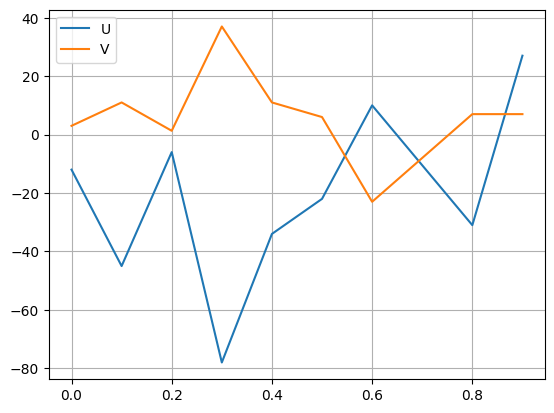

In [3]:

# Los arrays `u` y `v` representan dos series en función del tiempo `t`.
# 1) Grafique las dos series de datos en una misma imagen y guarde dicha gráfica sn mostrarla en 'serie.pdf'
# 2) Calcule la covarianza entre `u` y `v` e imprima su valor.
# 3) Calcule la varianza de `u` e imprima su valor.
# 4) Imprima un mensaje donde explique qué puede inferir del valor de covarianza obtenido.
import numpy as np
t = np.array([0.,0.1,0.2,0.3,0.4,0.5,0.6, 0.8, 0.9])
u = np.array([-12.,-45.,-6.,-78.,-34.,-22.,10.,-31.,27.])
v = np.array([3.,11.,1.3,37.,11.,6.,-23.,7.,7.])

plt.figure()
plt.plot(t, u, label=f"U")
plt.plot(t, v, label=f"V")
plt.grid(True)
plt.legend()
plt.savefig("serie.pdf", bbox_inches='tight')

u_bar = np.mean(u)
v_bar = np.mean(v)
u_shift = u - u_bar
v_shift = v - v_bar
cov_uv = np.sum(u_shift*v_shift)/(np.size(u) - 1)
var_u = np.sum(u_shift*u_shift)/(np.size(u) - 1)
var_v = np.sum(v_shift*v_shift)/(np.size(v) - 1)

print("varianza u:", var_u, ", varianza v:", var_v, ", covarianza uv:", cov_uv)

print("Las variables u y v estan inversamente relacionadas, si una aumenta, la otra disminuye")

# 5) Construya un código para obtener la matriz de covarianza de los datos anteriores. (compare su resultado con el de numpy.cov)

calc_cov = np.array([[var_u, cov_uv], [cov_uv, var_v]])
print("calculated matrix:")
print(calc_cov)
real_cov = np.cov(u, v)
print("np.cov matrix:")
print(real_cov)

**EJERCICIO 2:**

[[2.70448669 2.4044663  1.45784091 1.64101544]
 [2.4044663  2.94163122 1.60030594 1.80590181]
 [1.45784091 1.60030594 2.52082168 2.31242133]
 [1.64101544 1.80590181 2.31242133 2.71436626]]
Principal components (columns):
[[-0.49391128 -0.50203076 -0.70984479  0.01171101]
 [-0.52817872 -0.47304176  0.70076399 -0.07866743]
 [-0.46980861  0.54077759 -0.06702403 -0.69451224]
 [-0.50631883  0.48141065  0.02362183  0.71507135]]
Proportion of Variance: [0.76688522 0.16782361 0.03803049 0.02726068]
Cumulative proportion of Variance: [0.76688522 0.93470883 0.97273932 1.        ]
Considero que solo se necesitan 2 componentes principales, pues estos explican más del 90% de la varianza
El PC1 está compuesto de una agrupación uniforme y negativa de las variables originales, mientras que el PC2 se compone uniformemente de las variables Front negativas y Back positivas
El PC1 tiene sentido, pues las temperaturas parecen variar de forma unisona, pero no entiendo el porqué del negativo. El PC2 parece r

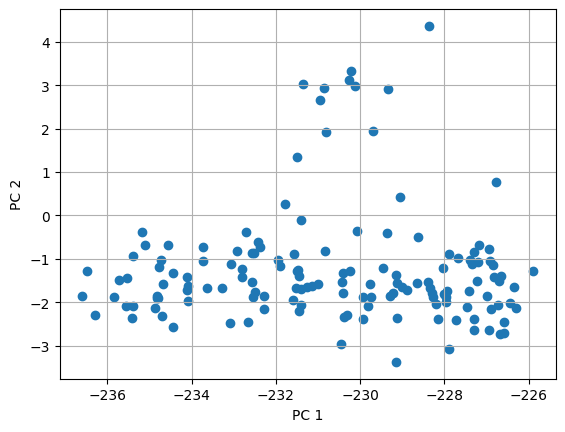

In [16]:
# 6) Repita lo anterior para obtener la matriz de covarianza de los datos del archivo: room-temperature.csv

Date,FL,FR,BL,BR = np.genfromtxt("room-temperature.csv", delimiter=",", unpack=True, skip_header=1)

# 6a) Grafique las 4 series de datos en una misma imagen y guarde dicha gráfica sin mostrarla en 'serieTemp.pdf'

#!Descomentar un gráfico a la vez para que se vea mejor

#plt.figure()
#plt.plot(FL, label=f"Front Left")
#plt.plot(FR, label=f"Front Right")
#plt.plot(BL, label=f"Back Left")
#plt.plot(BR, label=f"Back Right")
#plt.grid(True)
#plt.legend()
#plt.savefig("serieTemp.pdf", bbox_inches='tight')


# 7) Calcule los autovalores y los autovectores de la matriz de covarianza de los datos de temperatura.
#(use el paquete: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

temp_mat = np.stack((FL, FR, BL, BR), axis=0)
for i in range(4):
    temp_mat[i,:] = (temp_mat[i,:]) - np.mean(temp_mat[i,:])/np.std(temp_mat[i,:])

#Esta forma resulta en una matriz de cov que no parece reflejar las varianzas de los datos y da un resultado ligeramente distinto
#temp_cov = np.matmul(temp_mat, temp_mat.T) 

temp_cov = np.cov(temp_mat)
temp_evalues, temp_evectors = np.linalg.eig(temp_cov)

print(temp_cov)

# 8) Lea: https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
#Organice sus autovalores y autovectores e imprima cuales son sus componentes principales (puede usar paquetes de numpy para encontrar autovalores y autovectores. lea cuidadosamente la documentación.)

n = temp_evalues.size
for i in range(n):
    for j in range(0, n - i - 1):
        if temp_evalues[j] < temp_evalues[j+1]:
            temp_evalues[j], temp_evalues[j + 1] = temp_evalues[j + 1], temp_evalues[j]
            temp_evectors[:, j], temp_evectors[:, j + 1] = temp_evectors[:, j + 1], temp_evectors[:, j]

print("Principal components (columns):")
print(temp_evectors)

# 9) Imprima cuantos componentes principales considera que son necesarios para explicar sus datos.

prop_var = np.copy(temp_evalues)/np.sum(temp_evalues)
acu_var = np.empty(n)
sum = 0.0
for i in range(n):
    sum += prop_var[i]
    acu_var[i] = sum

print("Proportion of Variance:", prop_var.T)
print("Cumulative proportion of Variance:", acu_var.T)
print("Considero que solo se necesitan 2 componentes principales, pues estos explican más del 90% de la varianza")

#!Descomentar un gráfico a la vez para que se vea mejor

#labels = [f"PC{i+1}" for i in range(n)]
#plt.plot(prop_var, label=f"variance", marker='o')
#plt.plot(acu_var, label=f"cumulative variance", marker='o')
#plt.xlabel(f"Principal Components")
#plt.ylabel(f"Proportion of Variance")
#plt.xticks(ticks=np.arange(n), labels=labels)
#plt.legend()
#plt.grid(True)



# 10) Grafique sus datos en el nuevo sistema de referencia (PC1 PC2)


#Mientras lo pensaba noté que (P^-1)(Z^T) = ZP, con Z variables en col y Z^T variables en filas; P^-1 = P^T
#temp_evectors_inv = np.linalg.inv(temp_evectors)
#temp_mat_pc = np.matmul(temp_evectors_inv, temp_mat)
#plt.scatter(temp_mat_pc[0,:], temp_mat_pc[1,:])

temp_mat_pc = np.matmul(temp_mat.T, temp_evectors)

#!Descomentar un gráfico a la vez para que se vea mejor

plt.scatter(temp_mat_pc[:,0], temp_mat_pc[:,1])
plt.xlabel(f"PC 1")
plt.ylabel(f"PC 2")
plt.grid(True)


# 11) Comente cuales son las agrupaciones de sus variables originales que aparecen. Mire en su gráfica de los datos originales si el resultado tiene sentido.

print("El PC1 está compuesto de una agrupación uniforme y negativa de las variables originales, mientras que el PC2 se compone uniformemente de las variables Front negativas y Back positivas")
print("El PC1 tiene sentido, pues las temperaturas parecen variar de forma unisona, pero no entiendo el porqué del negativo. El PC2 parece reflejar la variabilidad entre las temperaturas")


**EJERCICIO 3:**

Principal components (columns):
Cumulative proportion of Variance: [0.98204467 0.99822116 0.99977867 0.9998996  0.99998788 0.99999453
 0.99999854 0.99999936 0.99999971 0.99999989 0.99999996 0.99999998
 0.99999999 0.99999999 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]
Considero que solo se necesita 1 componente principal, pues éste explica más del 98% de la varianza, pero para mejor visualización considerar 2
No realmente, pues se evidencia un cumulo notable y unos cuantos puntos dispersos <lejos> del mismo, pero no intuyo a qué corresponde cada uno o la frontera exacta entre el cumulo y los puntos <lejanos>


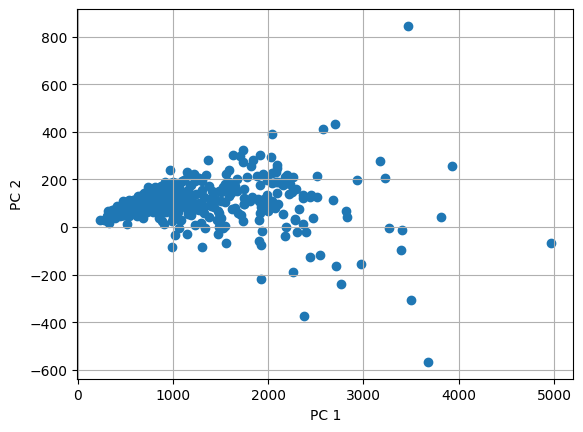

In [17]:
# 12) Repita lo anterior para obtener la matriz de covarianza de los datos del archivo: WCBD.dat

WCBD = np.genfromtxt("WDBC.dat", delimiter=",", usecols=range(2, 32))

for i in range(30):
    WCBD[:,i] = (WCBD[:,i]) - np.mean(WCBD[:,i])/np.std(WCBD[:,i])

# 13) Calcule los autovalores y los autovectores de la matriz de covarianza de los datos.
#(use el paquete: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

#Esta forma resulta en una matriz de cov que no parece reflejar las varianzas de los datos y da un resultado ligeramente distinto
#WCBD_cov = np.matmul(WCBD.T, WCBD)

WCBD_cov = np.cov(WCBD.T)
WCBD_evalues, WCBD_evectors = np.linalg.eig(WCBD_cov)

# 14) Lea: https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
#Organice sus autovalores y autovectores e imprima cuales son sus componentes principales (puede usar paquetes de numpy para encontrar autovalores y autovectores. lea cuidadosamente la documentación.)

n = WCBD_evalues.size
for i in range(n):
    for j in range(0, n - i - 1):
        if WCBD_evalues[j] < WCBD_evalues[j+1]:
            WCBD_evalues[j], WCBD_evalues[j + 1] = WCBD_evalues[j + 1], WCBD_evalues[j]
            WCBD_evectors[:, j], WCBD_evectors[:, j + 1] = WCBD_evectors[:, j + 1], WCBD_evectors[:, j]

#!Descomentar un print a la vez para que se vea mejor

print("Principal components (columns):")
#print(WCBD_evectors)


# 15) Imprima cuantos componentes principales considera que son necesarios para explicar sus datos.

prop_var = np.copy(WCBD_evalues)/np.sum(WCBD_evalues)
acu_var = np.empty(n)
sum = 0.0
for i in range(n):
    sum += prop_var[i]
    acu_var[i] = sum

#!Descomentar un print a la vez para que se vea mejor

#print("Proportion of Variance:", prop_var.T)
print("Cumulative proportion of Variance:", acu_var.T)
print("Considero que solo se necesita 1 componente principal, pues éste explica más del 98% de la varianza, pero para mejor visualización considerar 2")

#plt.plot(prop_var, label=f"variance", marker='o')
#plt.plot(acu_var, label=f"cumulative variance", marker='o')
#plt.xlabel(f"Principal Components")
#plt.ylabel(f"Proportion of Variance")
#plt.legend()
#plt.grid(True)


# 16) Grafique sus datos en el nuevo sistema de referencia (PC1 PC2)

WCBD_pc = np.matmul(WCBD, WCBD_evectors)

plt.scatter(WCBD_pc[:,0], WCBD_pc[:,1])
plt.xlabel(f"PC 1")
plt.ylabel(f"PC 2")
plt.grid(True)

# 17) Puede ver agrupaciones entre los tumores malignos y benignos?

print("No realmente, pues se evidencia un cumulo notable y unos cuantos puntos dispersos <lejos> del mismo, pero no intuyo a qué corresponde cada uno o la frontera exacta entre el cumulo y los puntos <lejanos>")

RECUERDE LOS PASOS:

descargar y limpiar los datos. Ampliarlos (si aplica)

restarles el promedio y normalizar (si aplica)

Calcular la matriz de covarianza de los datos

Encontrar autovalores y autovectores (usar paquete de numpy), y organizarlos (de mayor a menor autovalor)

Mirar los autovalores y decidir cuántos componentes principales (autovectores) mantener.

